[Home](../../README.md)

### Model Evaluation

I have chosen a **Multiple variable linear regression** approach after evaluating the model through:

* Linear regression
* Multiple variable linear regression
* Polynominal regression

We will also be calcluating the cost and loss, which can allow for comparisions and optimisation parameters. Additionally, we will evaluate x-axis intercept and coefficient values to directly indicate which features have the strongest influence on bike demand, helping prioritize which factors to focus on in business decisions.

* Tracking this after deployment can also identify seasonal patterns or degradation in model performance that may require retraining

#### Step 1

Load the required dependencies.


In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [3]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [4]:
x_col = 'Temp'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Count'])

* `reshape(-1,1)` is required as scikit-learn only allows 2D arrays
* Temp as an example

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

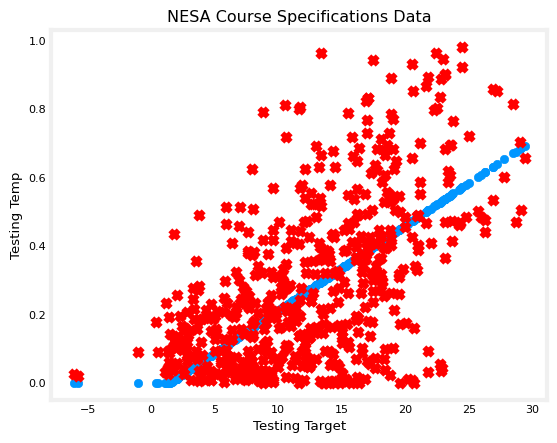

In [10]:
y_pred = model_A.predict(x_test)
y_pred = np.maximum(0, y_pred)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [6]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.2878202532089217


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [7]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     Date     Count  Predicted result      Loss
0     1.7  0.045000          0.004729  0.045000
1    16.1  0.182083          0.362043 -0.177917
2     2.7  0.158750          0.029542  0.128750
3    15.6  0.103333          0.349636 -0.246667
4     4.7  0.230417          0.079169  0.150417
..    ...       ...               ...       ...
539   5.5  0.025833          0.099020 -0.074167
540  12.1  0.624167          0.262789  0.364167
541   6.7  0.220833          0.128796  0.090833
542  15.3  0.386667          0.342192  0.046667
543  10.9  0.284167          0.233013  0.054167

[544 rows x 4 columns]
The cost or average loss of this model is 0.016342677696078407


Here are manual predictions to understand count prediction.

In [8]:
print(model_A.predict([[20]]))
print(model_A.predict([[10]]))

[0.45881536]
[0.21068072]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [12]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -0.03745391353233407
Coefficient: [0.02481346]


#### Step 9. Multiple Variable Linear Regression

* This model proved most effective and **will be deployed**.

In [132]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [133]:
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_col = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']

mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

* I have **seven** features, with some which I combined reused due to effectiveness standalone
* Other features such as snowfall and radiation were not used due to lack of variance in data, therefore hindering prediction

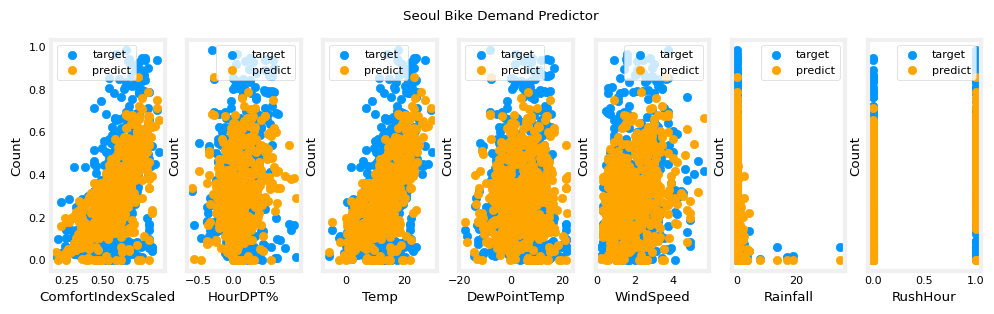

In [134]:
my_pred = model_C.predict(mx_test)
my_pred = np.maximum(0, my_pred)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Count"); ax[i].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [135]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5005173713386817


In [136]:
print(model_C.predict([[0.5,0.1,15,3,0.1,0.1,0.5]]))

[0.46872689]


In [57]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

     ComfortIndexScaled  HourDPT%  Temp  DewPointTemp  WindSpeed  Rainfall  \
0                  0.59      0.18  13.5           9.9        1.9       0.0   
1                  0.70      0.34  18.2          11.0        2.2       0.0   
2                  0.29     -0.01   2.3          -0.8        0.7       0.0   
3                  0.38     -0.00   3.7          -6.3        1.6       0.0   
4                  0.47      0.33   9.4           8.6        1.8       1.5   
..                  ...       ...   ...           ...        ...       ...   
539                0.40      0.27   7.3           6.6        1.9       0.0   
540                0.58      0.36  13.3           8.1        2.1       0.0   
541                0.32     -0.00   2.8          -1.5        2.6       0.0   
542                0.68      0.03  18.0           1.0        3.0       0.0   
543                0.47     -0.36   6.7          -8.8        1.9       0.0   

     RushHour    Target  Predicted result      Cost  
0        

In [137]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: 0.09831426221502476
Coefficient: [-0.58541793  0.36543213  0.04113423 -0.02072979  0.00792964 -0.0468101
  0.15128481]


* The positive intercept (0.0983) represents the baseline bike demand when all predictors are zero, suggesting a minimal baseline usage regardless of conditions.

* ComfortIndexScaled has the strongest negative influence on bike demand (coefficient ≈ -0.5854), suggesting that as the measured comfort index increases, fewer people choose to use bikes. This counterintuitive finding may warrant further investigation.
* HourDPT% shows a strong positive relationship (coefficient ≈ 0.3654), indicating that higher humidity levels may actually encourage bike usage in this context.

#### Polynominal Regression

* If my dataset were a bell curve, this would be effective. However, due to spikes occuring at two intervals it does not have this effect

In [13]:
filename = 'my_saved_model_v3.sav'
model_E = pickle.load(open(filename, 'rb'))

In [14]:
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_col = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']

mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

* Features are the same as before

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(mx_test)

# Create the model
my_model = LinearRegression()

# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

* The LinearRegression model already includes an intercept term by default, so `include_bias=False`

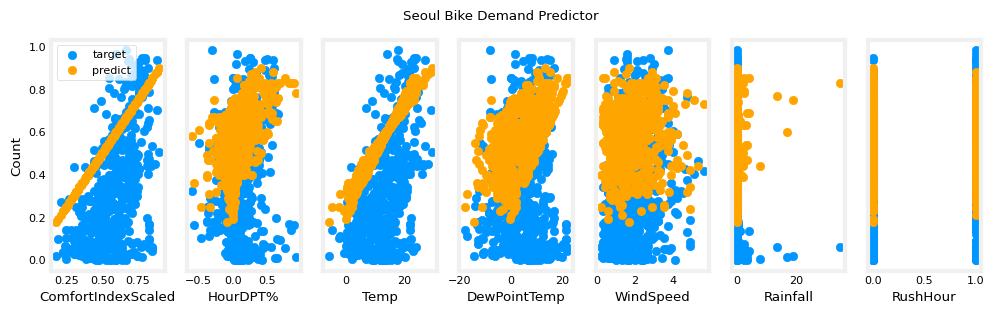

In [ ]:
my_pred = my_model.predict(poly_features)
my_pred = np.maximum(0, my_pred)

if len(mx_col) == 1:
    plt.scatter(mx_test, my_pred)
    plt.scatter(mx_test, my_test, marker='x', c='r')
    plt.title("Seoul Bike Demand Predictor")
    plt.ylabel("Count")
    plt.xlabel(mx_col[0])
else:
    fig, ax = plt.subplots(1, len(mx_col), figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(mx_test[:, i], my_test, label='target')
        ax[i].set_xlabel(mx_col[i])
        ax[i].scatter(mx_test[:, i], my_pred, color="orange", label='predict')
    ax[0].set_ylabel("Count")
    ax[0].legend()
    fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [119]:
test_score = model_E.score(poly_features, my_test)
print(f'Training data score: {test_score}')

Training data score: -0.8084667208881335


* Polynominal features led to overfitting even with 2 degrees and results to a poor and negative training data score

* Data hovered over 0.2

In [123]:
print(f'X Axis intercept: {model_E.intercept_}')
print(f'Coefficient: {model_E.coef_}')

X Axis intercept: -0.8049952803557932
Coefficient: [ 6.67569875e+00  1.59539921e+00 -1.39075237e-01 -5.25242387e-02
  2.78599408e-02 -4.11729656e-01  1.27111400e-01 -1.47119655e+01
 -6.40042791e+00  7.25081254e-01  1.34498833e-01  9.54534333e-02
  2.17846416e+00 -4.79531715e-01  5.82164068e-01  1.89010831e-01
 -3.66962850e-02  6.72323305e-02 -8.18324004e-02 -1.49908229e-01
 -9.04771264e-03 -3.15588232e-03 -1.63735481e-03 -1.12846984e-01
  1.67975428e-02 -3.20218679e-05 -3.09898950e-03  4.73402141e-02
  3.65848698e-05 -1.04836409e-02  4.24784542e-03 -1.26332054e-02
  8.09843184e-03 -4.44633417e-02  1.27111400e-01]


* Coefficient's are redundant

#### Step 10

Move to [3.operations\3.1.deploy_model](/workspaces/2025SE-Roman.Lac-Task2/3.operations/3.1.deploy_model/3.1.1.basic_model_depolyment.ipynb) folder.